<a href="https://colab.research.google.com/github/YanaStekolshchikova/da_course/blob/main/%D0%B4%D0%B71.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install ipython-sql prettytable==0.7.2

# Включение магической функции `sql`

In [2]:
%load_ext sql
%reload_ext sql

In [4]:
%sql sqlite:///northwind.db
%config SqlMagic.style = 'DEFAULT'

# Полезные ссылки, которые помогут решить ДЗ
Тут все про синтаксис работы `SQLite` - https://www.sqlitetutorial.net/sqlite-functions/
Что понадобится в ДЗ?
* `SELECT`, `FROM` - база
* `LIMIT` - выводит определенное кол-во строк
* `DISTINCT` - выводит уникальные строки по полю
* `ORDER BY` - сортирует строки
* `WHERE` - фильтрация строк
* `GROUP BY`
* `AS` - нужно чтобы переименовать колонку/таблицу
* `MIN`, `MAX`, `SUM`, `AVG`, `COUNT` - группировки (мин, макс, сумма, среднее, кол-во)
* `ROUND(number, 2)` - округляет кол-во цифр после запятой
* `DATE(date_column, 'start of month')` - приводит дату `2024-01-05` к первому дня месяца `2024-01-01`
* `DATE(date_column, 'start of year')` - приводит дату `2024-01-05` к первому дня года `2024-01-01`
* `CAST(column AS INT)` - приводит колонку к какому то типу
* `INNER JOIN` `LEFT JOINT` - нужно чтобы соединить по какому то правилу две таблицы

# Задача 0
Нужно вывести топ 5 городов пользователей, которые совершили заказы в 2016 году

In [50]:
%%sql
-- здесь код
SELECT
    DATE(orders.orderDate, 'start of year') AS order_year, -- можно было без этого, но просто хотел показать как работает функция
    customers.city                          AS city,  -- города пользователей
    COUNT(*)                                AS cnt, -- кол-во заказов
    COUNT(DISTINCT orders.customerID)       AS distinct_customer -- кол-во уникальных пользователей
FROM orders
    INNER JOIN customers
        ON customers.customerId = orders.customerId
WHERE orderDate >= '2016-01-01' AND orderDate < '2017-01-01' -- фильтруем даты (2016 год), '2016-01-01' автоматически переведется в тип DATE
GROUP BY 1, 2-- это говорит о том что, нужно группировать по 1, 2 колонке
ORDER BY 3 DESC -- это говорит о том что, нужно сортировать по 3 колонке
LIMIT 5 -- выводим 5 записей

 * sqlite:///northwind.db
Done.


order_year,city,cnt,distinct_customer
2016-01-01,London,89,6
2016-01-01,México D.F.,86,5
2016-01-01,Sao Paulo,65,4
2016-01-01,Madrid,56,3
2016-01-01,Rio de Janeiro,53,3


# Каждое задание имеет вес 1 балл

# Задание 1
(Это все один запрос)
* Выведите столбцы (`productId`, `productName`, `unitPrice`) из таблицы `products`
* Переименуйте поле `productName` в `product_name`
* Отсортируйте по ключу `productId`
* Ограничьтесь результатам 10 строк




In [52]:
%%sql

SELECT
    productId,
    productName AS product_name,
    unitPrice
FROM products
ORDER BY productId
LIMIT 10

 * sqlite:///northwind.db
Done.


ProductID,product_name,UnitPrice
1,Chai,18
2,Chang,19
3,Aniseed Syrup,10
4,Chef Anton's Cajun Seasoning,22
5,Chef Anton's Gumbo Mix,21.35
6,Grandma's Boysenberry Spread,25
7,Uncle Bob's Organic Dried Pears,30
8,Northwoods Cranberry Sauce,40
9,Mishi Kobe Niku,97
10,Ikura,31


# Задание 2
Выведите столбцы `CustomerID`, `CompanyName` и `City` из таблицы `Customers` для клиентов, у которых город (`City`) равен `'London'`. Отсортируйте результат по `CompanyName` в алфавитном порядке



In [53]:
%%sql
SELECT
    CustomerID,
    CompanyName,
    City
FROM
    Customers
WHERE
    City = 'London'
ORDER BY
    CompanyName ASC;  -- сортируем в алфавитном порядке

 * sqlite:///northwind.db
Done.


CustomerID,CompanyName,City
AROUT,Around the Horn,London
BSBEV,B's Beverages,London
CONSH,Consolidated Holdings,London
EASTC,Eastern Connection,London
NORTS,North/South,London
SEVES,Seven Seas Imports,London


# Задание 3
Выберите все столбцы из таблицы `Products` и отсортируйте товары по цене `UnitPrice` по убыванию. Отобразите только первые 5 записей



In [54]:
%%sql
SELECT *
FROM
    Products
ORDER BY
    UnitPrice DESC
LIMIT 5

 * sqlite:///northwind.db
Done.


ProductID,ProductName,SupplierID,CategoryID,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
38,Côte de Blaye,18,1,12 - 75 cl bottles,263.5,17,0,15,0
29,Thüringer Rostbratwurst,12,6,50 bags x 30 sausgs.,123.79,0,0,0,1
9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97,29,0,0,1
20,Sir Rodney's Marmalade,8,3,30 gift boxes,81,40,0,0,0
18,Carnarvon Tigers,7,8,16 kg pkg.,62.5,42,0,0,0


# Задание 4
Подсчитайте, сколько товаров находится в каждой категории `CategoryID` в таблице `Products`. В результате отобразите `CategoryID` и количество товаров в столбце с алиасом (`AS`) `productCnt`, обязательно отсортируйте по `CategoryID`



In [55]:
%%sql
SELECT
    CategoryID,
    COUNT(*) AS productCnt
FROM
    Products
GROUP BY
    CategoryID
ORDER BY
    CategoryID

 * sqlite:///northwind.db
Done.


CategoryID,productCnt
1,12
2,12
3,13
4,10
5,7
6,6
7,5
8,12


# Задание 5
Для каждой категории `CategoryID` из таблицы `Products` найдите минимальную, максимальную и среднюю цену товаров (`UnitPrice`). Выведите `CategoryID` и столбцы с алиасами `minPrice`, `maxPrice`, `avgPrice`. Отсортируйте по полю `CategoryId`, также округлите числа до `2` знаков после запятой, вам поможет функция `ROUND`



In [56]:
%%sql
SELECT
    CategoryID,
    ROUND(MIN(UnitPrice), 2) AS minPrice,
    ROUND(MAX(UnitPrice), 2) AS maxPrice,
    ROUND(AVG(UnitPrice), 2) AS avgPrice
FROM
    Products
GROUP BY
    CategoryID
ORDER BY
    CategoryID

 * sqlite:///northwind.db
Done.


CategoryID,minPrice,maxPrice,avgPrice
1,4.5,263.5,37.98
2,10.0,43.9,23.06
3,9.2,81.0,25.16
4,2.5,55.0,28.73
5,7.0,38.0,20.25
6,7.45,123.79,54.01
7,10.0,53.0,32.37
8,6.0,62.5,20.68


# Задание 6
* Сгруппируйте заказы (Orders) по первому дню месяца, переименуйте расчет в `monthStart`
* Подсчитайте, сколько заказов было сделано в каждом месяце, переименуйте расчет в `ordersCount`
* Отсортируйте по `monthStart`
* Выведите только первые 10 строк



In [57]:
%%sql
SELECT
    DATE(orderDate, 'start of month') AS monthStart,
    COUNT(*) AS ordersCount
FROM
    Orders
GROUP BY
    monthStart
ORDER BY
    monthStart
LIMIT 10

 * sqlite:///northwind.db
Done.


monthStart,ordersCount
2012-07-01,69
2012-08-01,122
2012-09-01,119
2012-10-01,111
2012-11-01,105
2012-12-01,128
2013-01-01,113
2013-02-01,100
2013-03-01,120
2013-04-01,123


# Задание 7
* Аналогично предыдущему, сгруппируйте заказы по первому дню года
* Посчитайте количество заказов в каждом году
* Выведите столбцы `yearStart` и `ordersCount`


In [58]:
%%sql
SELECT
    DATE(orderDate, 'start of year') AS yearStart,
    COUNT(*) AS ordersCount
FROM
    Orders
GROUP BY
    yearStart
ORDER BY
    yearStart

 * sqlite:///northwind.db
Done.


yearStart,ordersCount
2012-01-01,654
2013-01-01,1351
2014-01-01,1351
2015-01-01,1449
2016-01-01,1506
2017-01-01,1780
2018-01-01,1549
2019-01-01,1362
2020-01-01,1376
2021-01-01,1420


# Задание 8
Выведите `ProductID`, `ProductName`, исходную цену (`UnitPrice`) и цену, приведённую к целому числу (нужно функцию `CAST` применить). Приведенный `UnitPrice` выводите как поле `UnitPriceInt`. Отсортируйте по `ProductName` и ограничьте результат 10 строками.



In [59]:
%%sql
SELECT
    ProductID,
    ProductName,
    UnitPrice,
    CAST(UnitPrice AS INT) AS UnitPriceInt
FROM
    Products
ORDER BY
    ProductName
LIMIT 10

 * sqlite:///northwind.db
Done.


ProductID,ProductName,UnitPrice,UnitPriceInt
17,Alice Mutton,39,39
3,Aniseed Syrup,10,10
40,Boston Crab Meat,18.4,18
60,Camembert Pierrot,34,34
18,Carnarvon Tigers,62.5,62
1,Chai,18,18
2,Chang,19,19
39,Chartreuse verte,18,18
4,Chef Anton's Cajun Seasoning,22,22
5,Chef Anton's Gumbo Mix,21.35,21


# Задание 9
Объедините таблицы `Orders` (псевдоним o, используйте `AS`) и `Customers` (псевдоним c) по полю `CustomerID`, чтобы вывести `OrderID`, `CompanyName` и `OrderDate`, `CustomerId`. Отсортируйте по `CustomerID`. Ограничьте вывод 10 строками.


In [60]:
%%sql
SELECT
    o.OrderID,
    c.CompanyName,
    o.OrderDate,
    o.CustomerID
FROM
    Orders AS o
INNER JOIN
    Customers AS c
ON
    o.CustomerID = c.CustomerID
ORDER BY
    o.CustomerID
LIMIT 10

 * sqlite:///northwind.db
Done.


OrderID,CompanyName,OrderDate,CustomerID
10643,Alfreds Futterkiste,2017-08-25,ALFKI
10692,Alfreds Futterkiste,2017-10-03,ALFKI
10702,Alfreds Futterkiste,2017-10-13,ALFKI
10835,Alfreds Futterkiste,2018-01-15,ALFKI
10952,Alfreds Futterkiste,2018-03-16,ALFKI
11011,Alfreds Futterkiste,2018-04-09,ALFKI
11240,Alfreds Futterkiste,2020-12-27 13:13:57,ALFKI
11450,Alfreds Futterkiste,2016-01-07 07:28:54,ALFKI
11658,Alfreds Futterkiste,2019-03-10 15:53:13,ALFKI
11683,Alfreds Futterkiste,2015-09-30 17:07:34,ALFKI


# Задание 10
Объедините таблицы `Customers` (псевдоним `c`) и `Orders` (псевдоним `o`), чтобы для каждого города клиентов:  
* Подсчитать количество уникальных клиентов.
* Подсчитать общее число заказов, сделанных клиентами из этого города.
* Выведите столбцы:
    * `City` – город клиента
    * `CustomersCount` – количество уникальных клиентов в этом городе
    * `OrdersCount` – общее количество заказов.
* Отсортируйте результат по убыванию количества заказов и ограничьте вывод 10 строками.




In [61]:
%%sql
SELECT
    c.City,
    COUNT(DISTINCT c.CustomerID) AS CustomersCount,
    COUNT(o.OrderID) AS OrdersCount
FROM
    Customers AS c
LEFT JOIN
    Orders AS o
ON
    c.CustomerID = o.CustomerID
GROUP BY
    c.City
ORDER BY
    OrdersCount DESC
LIMIT 10

 * sqlite:///northwind.db
Done.


City,CustomersCount,OrdersCount
London,6,1049
México D.F.,5,898
Sao Paulo,4,720
Rio de Janeiro,3,552
Buenos Aires,3,516
Madrid,3,513
Lisboa,2,355
Paris,2,349
Nantes,2,347
None,2,335


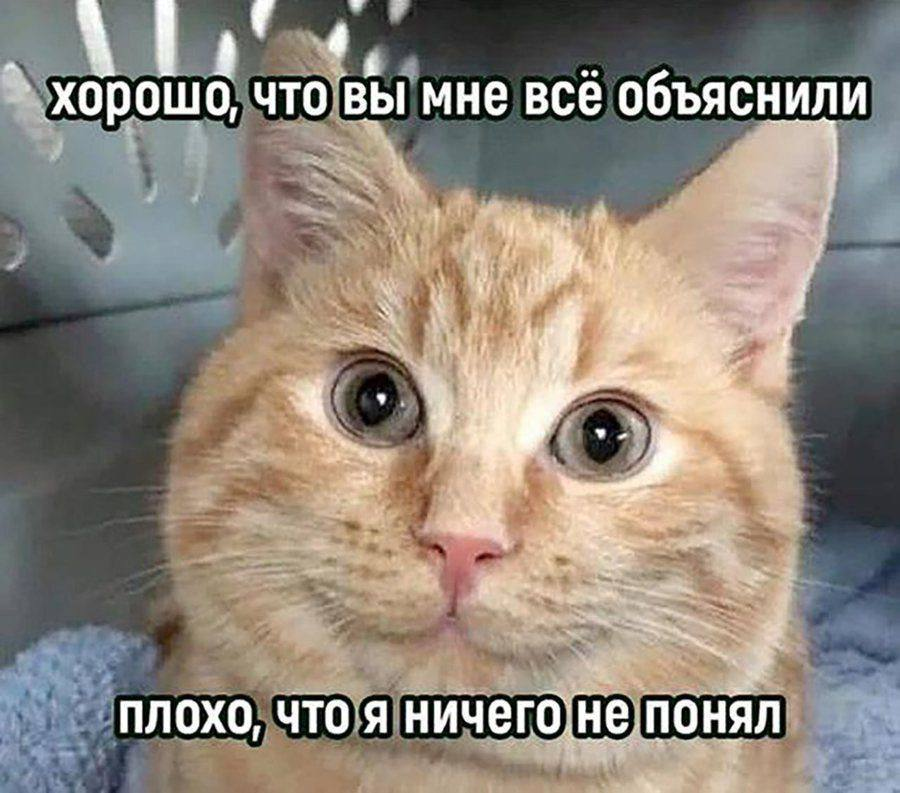

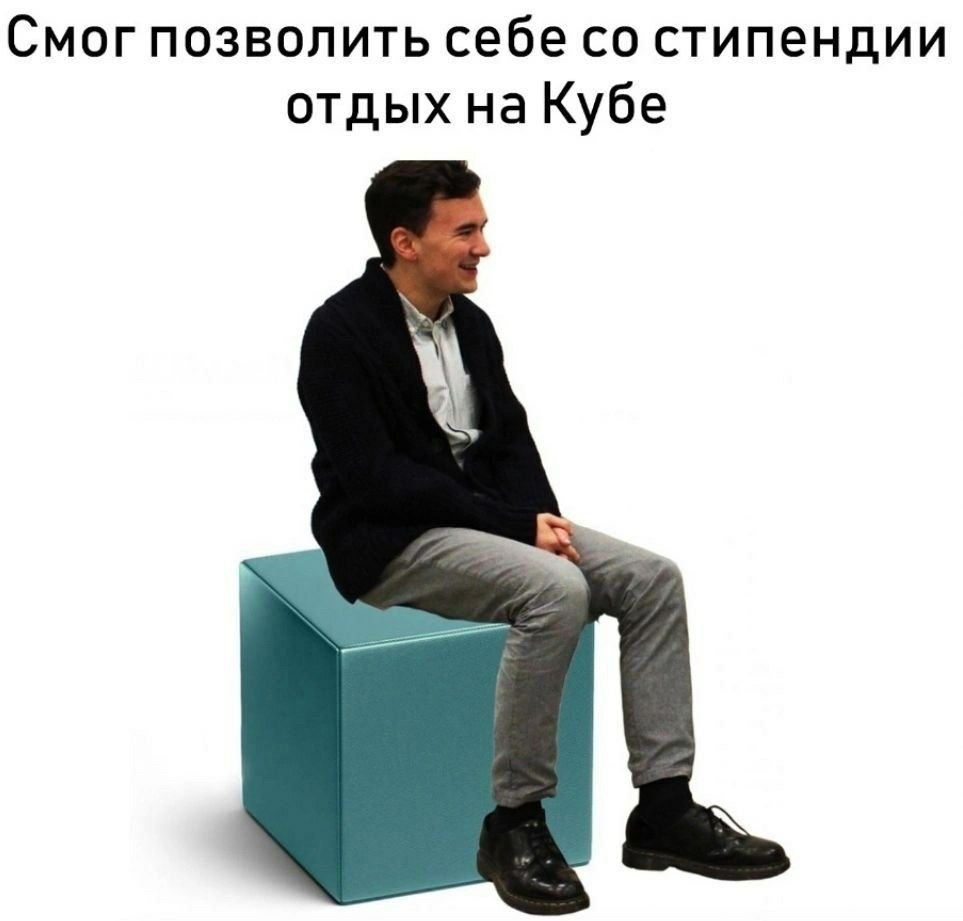